### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Abinashkumar\my diractory\deep learning\stock market dataset for rnn 8\NIFTY50_all.csv")

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [5]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
235187,2021-04-26,ZEEL,EQ,188.00,190.6,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.0,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.8,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.8,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894
235191,2021-04-30,ZEEL,EQ,186.55,185.3,190.95,183.65,185.00,185.60,187.53,11435285,2.144440e+14,62607.0,3323909.0,0.2907


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0         962.90
1         893.90
2         884.20
3         921.55
4         969.30
           ...  
235187    186.40
235188    188.15
235189    189.10
235190    186.55
235191    185.60
Name: Close, Length: 235192, dtype: float64

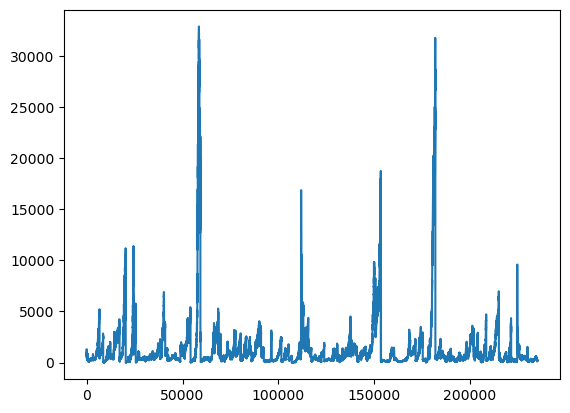

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
import numpy as np
import tensorflow.keras as ks

In [11]:
df1

0         962.90
1         893.90
2         884.20
3         921.55
4         969.30
           ...  
235187    186.40
235188    188.15
235189    189.10
235190    186.55
235191    185.60
Name: Close, Length: 235192, dtype: float64

### PREPROCESSING THE DATA

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.02903101]
 [0.02693073]
 [0.02663548]
 ...
 [0.00547746]
 [0.00539984]
 [0.00537093]]


### SPLIT THE DATASET

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(152874, 82318)

In [16]:
train_data

array([[0.02903101],
       [0.02693073],
       [0.02663548],
       ...,
       [0.29363555],
       [0.29611936],
       [0.29574953]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(152773, 100)
(152773,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(82217, 100)
(82217,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### ADD THE LAYERS

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1,batch_size=64,verbose=1)

2388/2388 [==============================] - 1042s 433ms/step - loss: 7.4870e-05 - val_loss: 3.7269e-05


In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.13.0'

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2570/2570 [==============================] - 133s 52ms/step


### TRANSFORM THE DATA IN ORIGINAL FORMAT

In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

273.41040082145827

### CALCULATE MEAN SQUARED ERROR

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

293.07652201244144

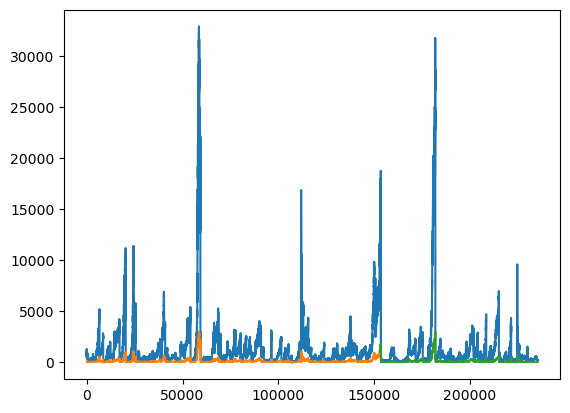

In [31]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

82318

In [36]:
x_input=test_data[11516:].reshape(1,-1)
x_input.shape


(1, 70802)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.002733404763064336,
 0.0026923123752008965,
 0.0027501461062679595,
 0.0027501461062679595,
 0.0028247211805386458,
 0.002783628792675206,
 0.0027349267033555742,
 0.0027714532703452983,
 0.002727317001899382,
 0.0027775410315102524,
 0.00276993133005406,
 0.002804935956752545,
 0.0027014440169483276,
 0.002716663419860713,
 0.0026177373009302106,
 0.0026512199873374572,
 0.002614693420347733,
 0.002645132226172503,
 0.0026420883455900265,
 0.0026238250620951643,
 0.0026436102858812646,
 0.0026436102858812646,
 0.002654263867919934,
 0.002614693420347733,
 0.0025751229727755324,
 0.002564469390736863,
 0.002579688793649248,
 0.0025872984951054406,
 0.0025903423756879177,
 0.002526420883455901,
 0.002604039838309064,
 0.0026162153606389717,
 0.002570557151901817,
 0.0025751229727755324,
 0.0026314347635513565,
 0.0026527419276286958,
 0.002733404763064336,
 0.002804935956752545,
 0.002716663419860713,
 0.0027044878975308047,
 0.002702965957239566,
 0.0026892684946184194,
 0.002734926

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=70801
i=0
while(i<10):

    if(len(temp_input)>1516):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.00269231 0.00275015 0.00275015 ... 0.00547746 0.00539984 0.00537093]
0 day output [[0.00054192]]
1 day input [0.00275015 0.00275015 0.00282472 ... 0.00539984 0.00537093 0.00054192]
1 day output [[0.00054477]]
2 day input [0.00275015 0.00282472 0.00278363 ... 0.00537093 0.00054192 0.00054477]
2 day output [[0.0005521]]
3 day input [0.00282472 0.00278363 0.00273493 ... 0.00054192 0.00054477 0.0005521 ]
3 day output [[0.00056054]]
4 day input [0.00278363 0.00273493 0.00277145 ... 0.00054477 0.0005521  0.00056054]
4 day output [[0.00056676]]
5 day input [0.00273493 0.00277145 0.00272732 ... 0.0005521  0.00056054 0.00056676]
5 day output [[0.00056831]]
6 day input [0.00277145 0.00272732 0.00277754 ... 0.00056054 0.00056676 0.00056831]
6 day output [[0.00056389]]
7 day input [0.00272732 0.00277754 0.00276993 ... 0.00056676 0.00056831 0.00056389]
7 day output [[0.0005532]]
8 day input [0.00277754 0.00276993 0.00280494 ... 0.00056831 0.00056389 0.0005532 ]
8 day output [[0.00053

In [56]:
day_new=np.arange(101,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt

In [58]:
len(df1)

235192

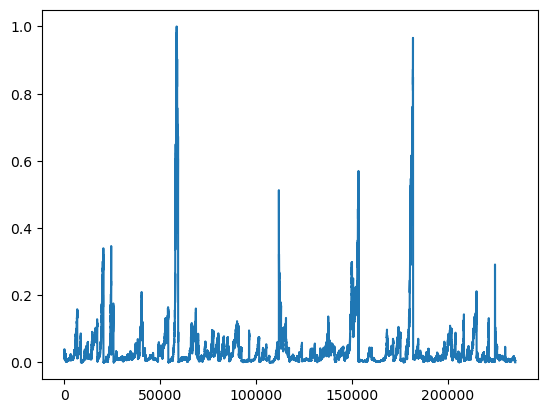

In [62]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[10:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

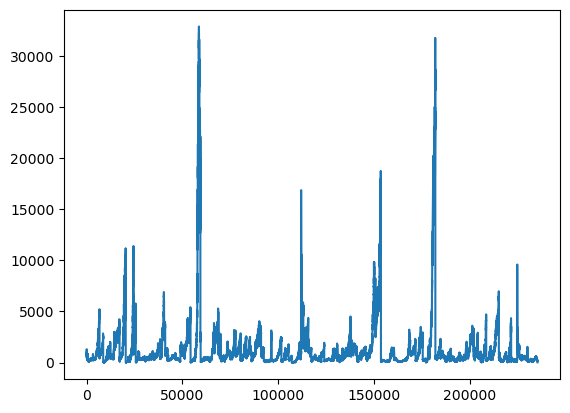

In [44]:
plt.plot(df3)